##Importing Libraries

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Loading and Splitting Dataset

The MNISt dataset consists of images of handwritten digits from 0-9 

In [2]:
mnist = tf.keras.datasets.mnist 

In [4]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

going to show only pixel values

In [10]:
print(x_train[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

showing the data at index 2

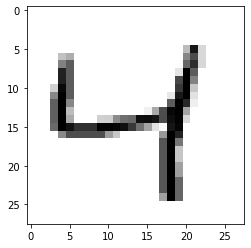

In [6]:
plt.imshow(x_train[2],cmap=plt.cm.binary)
plt.show()

##Normalising the Data

In [7]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [11]:
print(x_train[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

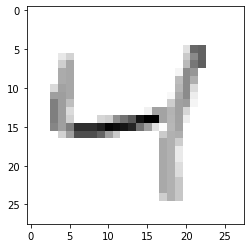

In [8]:
plt.imshow(x_train[2],cmap=plt.cm.binary)
plt.show()

##Creating our Data model

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2669 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1086 - accuracy: 0.9674
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0759 - accuracy: 0.9756
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0546 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0415 - accuracy: 0.9862


##Calculating the validation loss and accuracy

In [19]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0813 - accuracy: 0.9751
0.08130859583616257 0.9750999808311462


##Saving the model

In [20]:
model.save('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model/assets


In [21]:
new_model = tf.keras.models.load_model('num_reader.model')

##Making Predictions

In [22]:
predictions = new_model.predict([x_test])

In [23]:
print(predictions)

[[2.0312765e-10 2.7081093e-10 3.7384117e-07 ... 9.9995983e-01
  5.7415780e-11 6.1385244e-08]
 [3.0908129e-10 5.0149529e-06 9.9999452e-01 ... 3.9100998e-13
  1.8085753e-07 4.1445523e-12]
 [3.7506234e-09 9.9995470e-01 4.6997061e-06 ... 6.7225037e-06
  3.6160097e-06 6.8112973e-09]
 ...
 [1.3818686e-12 2.2535392e-08 5.3997531e-09 ... 1.5000052e-07
  5.2634022e-07 3.6685634e-04]
 [4.4537540e-08 7.6661815e-09 2.4889954e-10 ... 3.6292547e-09
  5.5890545e-05 1.2899943e-09]
 [3.7094144e-10 2.9131495e-12 7.2581247e-10 ... 3.8303108e-14
  6.9500636e-09 1.0322779e-10]]


In [27]:
print(np.argmax(predictions[2]))

1


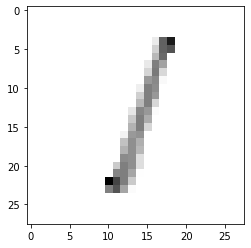

In [31]:
plt.imshow(x_test[2],cmap=plt.cm.binary)
plt.show()